In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [4]:
train_datagen = ImageDataGenerator(rescale=1./225,validation_split=0.2)

In [5]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer/Train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 3200 images belonging to 4 classes.


In [7]:
val_generator = train_datagen.flow_from_directory( '/content/drive/MyDrive/Alzheimer/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 4 classes.


In [8]:
class_indices = train_generator.class_indices
class_name = list(class_indices.keys())
print("class indices:",class_indices)
print("class names:",class_name)

class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [9]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1122s 11s/step - accuracy: 0.3518 - loss: 1.5957 - val_accuracy: 0.5387 - val_loss: 1.0077
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.6316 - loss: 0.8671 - val_accuracy: 0.6313 - val_loss: 0.8509
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.7174 - loss: 0.6495 - val_accuracy: 0.6400 - val_loss: 0.8034
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.7904 - loss: 0.5088 - val_accuracy: 0.6525 - val_loss: 0.8290
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.8780 - loss: 0.3312 - val_accuracy: 0.6413 - val_loss: 0.9510


In [12]:
model.save('/content/drive/MyDrive/Alzheimer/alzheimer.h5')

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/Alzheimer/alzheimer.h5')
print("Model Loaded")

Model Loaded


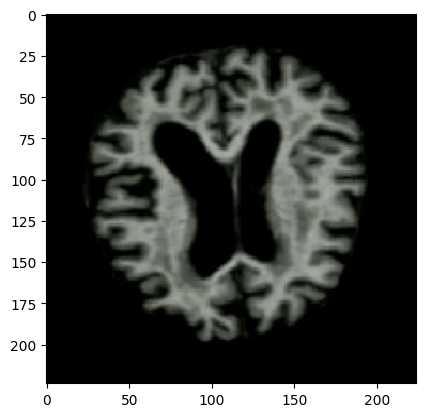

In [14]:
test_image_path="/content/drive/MyDrive/Alzheimer/Train/MildDemented/002cb9c1-b160-4c76-b7e4-5fb2f1b527f7.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255

In [17]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
VeryMildDemented
